In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)
print('libraries Imported!')

libraries Imported!


1. Fetch the Data

In [3]:
raw_data = pd.read_csv("purchases.csv")

In [4]:
# Creating a copy of original data , so any changes is the data won't reflect real-fetched data
sales = raw_data.copy()
sales.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,23,Credit Card,Weekly


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Previous Purchases      3900 non-null   int64  
 14  Payment Method          3900 non-null   

In [6]:
print('Statistical View of the dataset'.upper())
print('--'*50)
sales.describe()

STATISTICAL VIEW OF THE DATASET
----------------------------------------------------------------------------------------------------


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
print('Shape of the dataset:'.upper())
print('--'*30)
print(f'This dataset has {sales.shape[0]} columns and {sales.shape[1]} rows.')

SHAPE OF THE DATASET:
------------------------------------------------------------
This dataset has 3900 columns and 16 rows.


DATA DISTRIBUTION:
----------------------------------------------------------------------------------------------------


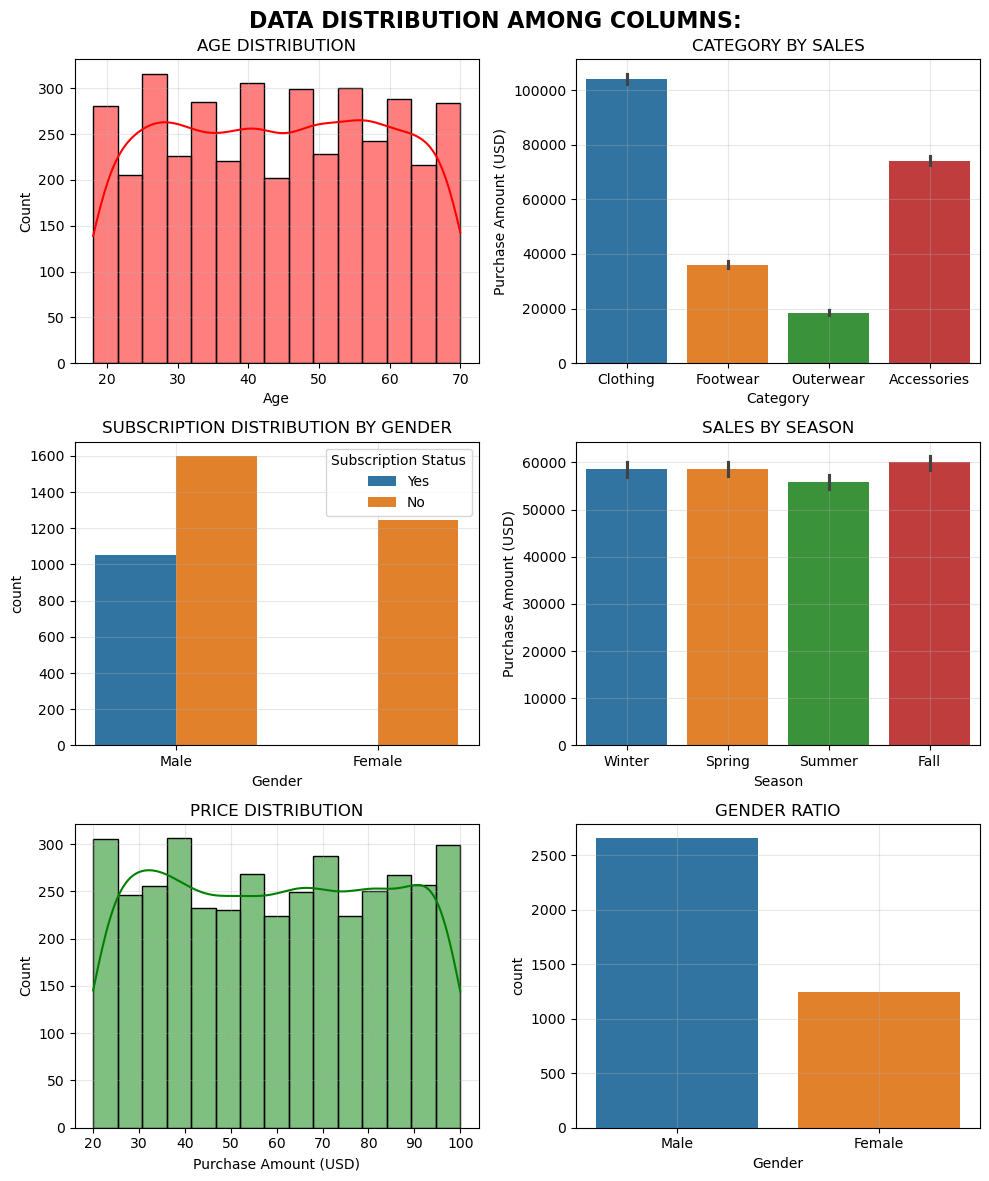

In [8]:
print('DATA DISTRIBUTION:')
print('--'*50)

fig,axs = plt.subplots(3,2,figsize = (10 , 12))
fig.suptitle('Data Distribution among columns:'.upper() , fontweight = 'bold' , fontsize = 16)

axs = axs.flatten()

sns.histplot(sales['Age'] ,bins = 15 ,  kde = True , color = 'red',  ax = axs[0])
axs[0].set_title('Age Distribution'.upper())
axs[0].set_xlabel('Age')

sns.barplot(data = sales , x = 'Category' , y = 'Purchase Amount (USD)' , hue= 'Category' , estimator=np.sum ,ax = axs[1])
axs[1].set_title('Category by sales'.upper())
axs[1].set_xlabel('Category')

sns.countplot(data = sales , x = 'Gender' , hue = 'Subscription Status' , ax = axs[2])
axs[2].set_title('Subscription Distribution by Gender'.upper())

sns.barplot(data= sales , x = 'Season' , y = 'Purchase Amount (USD)' , hue = 'Season' , estimator = np.sum , ax = axs[3])
axs[3].set_title('Sales by season'.upper())

sns.histplot(sales['Purchase Amount (USD)'] , kde = True ,color = 'green' ,ax = axs[4])
axs[4].set_title('Price Distribution'.upper())

sns.countplot(data = sales , x = 'Gender' , hue = 'Gender' , ax = axs[5])
axs[5].set_title('Gender ratio'.upper())

for ax in axs:
    ax.grid(True , alpha = 0.3)

plt.tight_layout()
plt.show()

2. Feature Engineering

In [9]:
# space optimisation
print(f'Memory used by dataset before optimisation is {sales.memory_usage().sum() / (1024 ** 2):.2f} MB')
print('--' * 40)
for col in sales.columns:
    if sales[col].nunique() < 10:
        sales[col] = sales[col].astype('category')

print(f'Memory used by dataset after optimisation is {sales.memory_usage().sum() / (1024 ** 2):.2f} MB')

Memory used by dataset before optimisation is 0.48 MB
--------------------------------------------------------------------------------
Memory used by dataset after optimisation is 0.27 MB


In [10]:
# mapping varialbes to numbers to help the model train better
size_map = {'S' : 0 , 'M' : 1 , 'L' : 2 , 'XL' : 3}
sales['Size'] = sales['Size'].map(size_map)

In [11]:
binary_col =['Subscription Status','Discount Applied']

for col in binary_col:
    sales[col] = sales[col].map({'Yes' : 1 , 'No' : 0})

In [12]:
freq_map = { "Weekly": 1, "Bi-Weekly": 2,
            "Fortnightly": 3, "Monthly": 4,
            "Quarterly": 5, "Every 3 Months": 6,
            "Annually": 7
           }
sales["Frequency of Purchases"] = sales["Frequency of Purchases"].map(freq_map)

In [13]:
# frequency encoding high-cardinality values

high_cards = ['Item Purchased' , 'Location' ,'Color']
for col in high_cards:
    freq_map = sales[col].value_counts(normalize = True)
    sales[col] = sales[col].map(freq_map)


In [14]:
#one-hot-encoding
one_hot_cols = ['Gender' ,'Category' , 'Season'  , 'Payment Method']
sales = pd.get_dummies(data= sales , columns = one_hot_cols , drop_first=True , dtype = int)

In [15]:
sales.head(3)

,Customer ID,Age,Item Purchased,Purchase Amount (USD),Location,Size,Color,Review Rating,Subscription Status,Discount Applied,...,Category_Footwear,Category_Outerwear,Season_Spring,Season_Summer,Season_Winter,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo
0,1,55,0.043846,53,0.020256,2,0.040769,3.1,1,1,...,0,0,0,0,1,0,0,0,0,1
1,2,19,0.042051,64,0.019744,2,0.040513,3.1,1,1,...,0,0,0,0,1,1,0,0,0,0
2,3,50,0.031795,73,0.018462,0,0.040513,3.1,1,1,...,0,0,1,0,0,0,1,0,0,0


3. Scaling and Principal Component Ananysis(PCA)

In [16]:
import sklearn

from sklearn.model_selection import GridSearchCV , train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.pipeline import Pipeline
print('Importing essential libraries')

Importing essential libraries


In [26]:
X = sales.drop(columns = ['Purchase Amount (USD)' , 'Customer ID']).copy()
y = sales['Purchase Amount (USD)']

In [27]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [29]:
sales_pca = pd.DataFrame(data = X_pca , columns=['PC1' , 'PC2'])
sales_pca.head(3)

,PC1,PC2
0,1.845115,-1.900853
1,1.765022,-1.625995
2,2.082752,0.278848


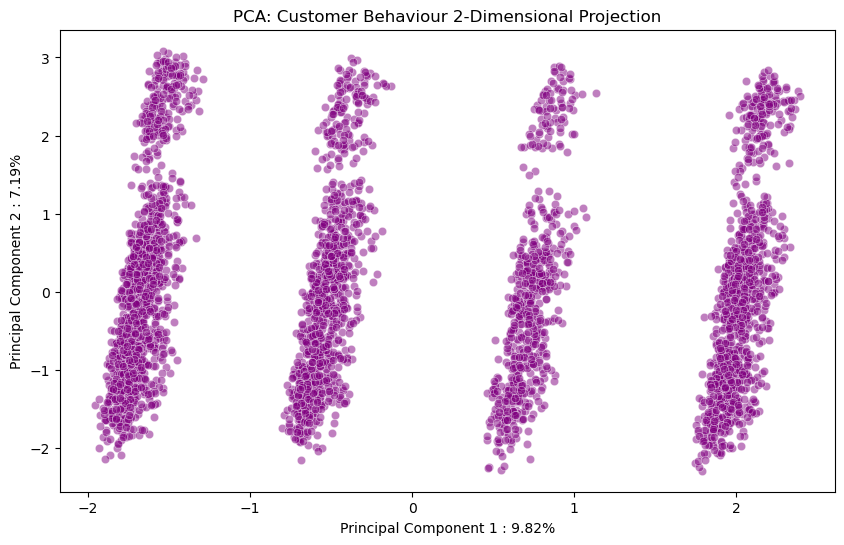

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = sales_pca , x = 'PC1' , y = 'PC2' , alpha= 0.5 , color = 'purple')
plt.xlabel(f'Principal Component 1 : {pca.explained_variance_ratio_[0]*100:.2f}%')
plt.ylabel(f'Principal Component 2 : {pca.explained_variance_ratio_[1]*100:.2f}%')
plt.title('PCA: Customer Behaviour 2-Dimensional Projection')
plt.show()

4. Development and Evaluation of Tree-Based Regression Models

In [31]:
# splitting datset in train set and test set
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 , random_state=30)

In [32]:
models = {
    'Random Forest' : {
       'model' :  RandomForestRegressor(random_state=30),
        'params' : {
            'model__n_estimators' : [100 , 200 , 300],
            'model__max_depth' : [None , 5 , 10 , 20], 
            'model__min_samples_split' : [2 , 5 , 10],
            'model__min_samples_leaf' : [1 , 2 ,4]
        }
    },
    'Gradient Boost' :{
       'model' :  GradientBoostingRegressor(),
        'params' : {
            'model__n_estimators' : [100, 200],
            'model__learning_rate' : [0.01, 0.05, 0.1],
            'model__max_depth' : [3, 5, 7],
            'model__subsample' : [0.8, 1.0]
        }
    }
}

In [45]:
results = [] 

for model_name , config in models.items():

    pipe = Pipeline([
        ('model' , config['model'])
    ])

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=config['params'],
        cv=5,
        n_jobs=-1,
        scoring = 'neg_root_mean_squared_error'
    )

    grid.fit(X_train ,y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test , y_pred))
    r2  = r2_score(y_test , y_pred)

    results.append({
        'model' : model_name,
        'best parmeters' : grid.best_params_,
        'rmse' : rmse,
        'r2 score' : r2
    })

In [48]:
results_df = pd.DataFrame(results).sort_values(by = 'rmse')
results_df

,model,best parmeters,rmse,r2 score
0,Random Forest,"{'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2, 'model__n_estimators': 200}",23.641753,0.003803
1,Gradient Boost,"{'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.8}",23.673213,0.001150


In [42]:
baseline_rmse = np.sqrt(mean_squared_error(y_test, [y_train.mean()] * len(y_test)))
print('Baseline RMSE', round(baseline_rmse , 2))

Baseline RMSE 23.69


RMSE (~23) was effectively equal to the baseline error obtained by predicting the mean purchase amount.This indicates that the available features do not meaningfully explain the variance in the target variable, and the model is unable to learn a predictive relationship beyond the naive baseline.

5. Final Evaluation Using Cross-Validation

In [49]:
final_pipe = Pipeline([
            ('model' , RandomForestRegressor(max_depth=5 , min_samples_leaf=4 , min_samples_split=2 , n_estimators=200))
                ])
final_pipe.fit(X , y)
print('Model trained succesfully!')
print('\n')
print('Pipeline of the model')
final_pipe

Model trained succesfully!


Pipeline of the model


Pipeline(steps=[('model',
                 RandomForestRegressor(max_depth=5, min_samples_leaf=4,
                                       n_estimators=200))])

In [50]:
r2_scores = cross_val_score(final_pipe, X , y , cv = 10 , scoring = 'r2')
rmse_scores = -cross_val_score(final_pipe , X, y , cv = 10 , scoring='neg_root_mean_squared_error')

print("Mean R² :", round(r2_scores.mean(),2))
print("Mean RMSE:", round(rmse_scores.mean() , 2))

Mean R² : -0.01
Mean RMSE: 23.73
